In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/bank.csv"
BankData = pd.read_csv(url)
BankData.head(5)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [3]:
BankData['y'].unique()  #you can use unique if you would like to find out how many unique attributes each variable have

array(['no', 'yes'], dtype=object)

For dictionary of data please refer to https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Our goal is to define a model best predicts outcome y - success of the marketing campaign 

First let's create dummy variables for default, marital, housing, and loan

In [43]:
Default_dummy  = pd.get_dummies(BankData['default'], prefix = 'default')
del Default_dummy['default_no']

marital_dummy  = pd.get_dummies(BankData['marital'], prefix = 'marital')
del marital_dummy['marital_married']
del marital_dummy['marital_divorced']

housing_dummy  = pd.get_dummies(BankData['housing'], prefix = 'housing')
del housing_dummy['housing_no']

loan_dummy = pd.get_dummies(BankData['loan'], prefix = 'loan')
del loan_dummy['loan_no']

BankData = pd.concat([BankData,marital_dummy , Default_dummy, housing_dummy, loan_dummy], axis=1)
BankData.head()



,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,marital_single,default_yes,housing_yes,loan_yes
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no,0,0,0,0
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no,0,0,1,1
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no,1,0,1,0
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no,0,0,1,1
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no,0,0,1,0


In [5]:
X = BankData[['age','balance','duration','campaign','pdays','previous','marital_single','default_yes','housing_yes','loan_yes']]
y = BankData['y']

#### Run a Logistic Regression Line on your inputs and output

In [7]:
lm = LogisticRegression()
lm.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### What is your 10-fold cross-validation error?

In [9]:
print cross_val_score(lm,X,y,cv=10).mean()

0.890070132255


#### Construct a confusion matrix.

In [10]:
from sklearn.metrics import confusion_matrix
y_hat = lm.predict(X)
confusion_matrix(y, y_hat)

array([[3923,   77],
       [ 425,   96]])

#### Interpret your coefficients. (At least interpret campaign, marital_single, and default_yes. Do your interpretations  make sense?

In [17]:
print X.columns.values
print zip(X.columns.values, lm.coef_[0])

['age' 'balance' 'duration' 'campaign' 'pdays' 'previous' 'marital_single'
 'default_yes' 'housing_yes' 'loan_yes']
[('age', 0.0014290421443218615), ('balance', 1.0599594947486169e-05), ('duration', 0.0037846839829103322), ('campaign', -0.090806981123372515), ('pdays', 0.0024275178533043501), ('previous', 0.095258739968724498), ('marital_single', 0.17049752825073086), ('default_yes', 0.13909866201365745), ('housing_yes', -0.98936128707424231), ('loan_yes', -0.85394880695872422)]


Answer: For each unit increase in campaign, Subscriptions goes down. Single people are .17 percent more likely to subscribe, People who have defaulted are 14 percent more likely to have subscribed

#### What is your prediction for a person who is 30 years old, 1000 dollars balance, with duration = 210 , has been contacted 3 times for this campaign (campaign = 3), with pdays = 100, who has previously been contacted 4 times, who is single, never defaulted, home owner and doesn't have any loan?

In [21]:
print lm.predict([30, 1000, 210, 3,100,4,1,0,1,0])
print lm.predict_proba([30, 1000, 210, 3,100,4,1,0,1,0])

['no']
[[ 0.92118513  0.07881487]]


/Users/jcano/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jcano/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


#### Now standardize your data - you can use standardization method used for KNN algorithms.

In [39]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

for i in X.columns.values:
    BankData[i] = Standardize(BankData[i])
    


age
balance
duration
campaign
pdays
previous
marital_single
default_yes
housing_yes
loan_yes


#### Use 10-fold cross validation to find the best tuning parameter - C.

0
1
3
4
5
11
14


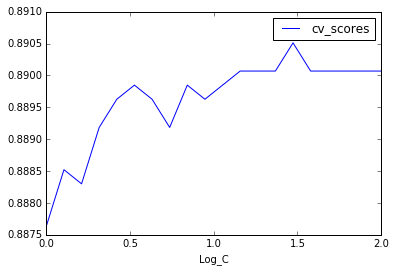

In [56]:
c_list = np.logspace(0, 2, 20)
c_index = np.linspace(0, 2, 20)

cv_scores = []
for score in c_list:
    lm = LogisticRegression(C = score)
    cv_scores.append(cross_val_score(lm, X_standardize, y, cv=10).mean())
    
max_score = 0
for i,x in enumerate(cv_scores):
    if x > max_score:
        print i
        max_score = x
    
C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )

#### Now use the best C you found above and repeat your analysis and look over your coefficients

In [57]:
lm = LogisticRegression(C = (10 ** 1.4))
lm.fit(X, y)
print zip(X.columns.values, lm.coef_[0])


[('balance', 3.8324186581127075e-06), ('campaign', -0.093725705822328462), ('previous', 0.14246132157437644), ('marital_single', 0.22423957065147179), ('default_yes', 0.064392898949592048), ('housing_yes', -0.67424401535570089), ('loan_yes', -0.7221208353896631)]


In [ ]:
#It will be easier for you to zip the name of variables and your coefficients


#### If you would like to drop 3 variables from your analysis, which variables are you going to choose?

Answer: Age, duration and pdays.


In [48]:
X.corr()

,age,balance,duration,campaign,pdays,previous,marital_single,default_yes,housing_yes,loan_yes
age,1.000000,0.083820,-0.002367,-0.005148,-0.008894,-0.003511,-0.410768,-0.017885,-0.193888,-0.011250
balance,0.083820,1.000000,-0.015950,-0.009976,0.009437,0.026196,0.007525,-0.070886,-0.050227,-0.071349
duration,-0.002367,-0.015950,1.000000,-0.068382,0.010380,0.018080,0.024560,-0.011615,0.015740,-0.004997
campaign,-0.005148,-0.009976,-0.068382,1.000000,-0.093137,-0.067833,-0.008093,-0.012348,-0.003574,0.017120
pdays,-0.008894,0.009437,0.010380,-0.093137,1.000000,0.577562,0.020693,-0.026317,0.116893,-0.031086
previous,-0.003511,0.026196,0.018080,-0.067833,0.577562,1.000000,0.035558,-0.026656,0.038621,-0.022115
marital_single,-0.410768,0.007525,0.024560,-0.008093,0.020693,0.035558,1.000000,0.007391,-0.041449,-0.048496
default_yes,-0.017885,-0.070886,-0.011615,-0.012348,-0.026317,-0.026656,0.007391,1.000000,0.006881,0.063994
housing_yes,-0.193888,-0.050227,0.015740,-0.003574,0.116893,0.038621,-0.041449,0.006881,1.000000,0.018451
loan_yes,-0.011250,-0.071349,-0.004997,0.017120,-0.031086,-0.022115,-0.048496,0.063994,0.018451,1.000000


In [50]:
newBank = BankData.copy()
del newBank["age"] 
del newBank["duration"] 
del newBank["pdays"] 
newBank.corr()

,balance,campaign,previous,marital_single,default_yes,housing_yes,loan_yes
balance,1.000000,-0.009976,0.026196,0.007525,-0.070886,-0.050227,-0.071349
campaign,-0.009976,1.000000,-0.067833,-0.008093,-0.012348,-0.003574,0.017120
previous,0.026196,-0.067833,1.000000,0.035558,-0.026656,0.038621,-0.022115
marital_single,0.007525,-0.008093,0.035558,1.000000,0.007391,-0.041449,-0.048496
default_yes,-0.070886,-0.012348,-0.026656,0.007391,1.000000,0.006881,0.063994
housing_yes,-0.050227,-0.003574,0.038621,-0.041449,0.006881,1.000000,0.018451
loan_yes,-0.071349,0.017120,-0.022115,-0.048496,0.063994,0.018451,1.000000


In [53]:
X = newBank[['balance','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']]
y = newBank['y']
lm.fit(X, y)
print zip(X.columns.values, lm.coef_[0])

[('balance', 1.0538552820250459e-06), ('campaign', -0.10227498048309182), ('previous', 0.13798559102653313), ('marital_single', 0.19050431362011608), ('default_yes', 0.0024844681127179379), ('housing_yes', -0.72256450504054925), ('loan_yes', -0.5899642388406896)]


In [54]:
newBank.head()

,marital,education,default,balance,housing,loan,contact,campaign,previous,poutcome,y,marital_single,default_yes,housing_yes,loan_yes
0,married,primary,no,1787,no,no,cellular,1,0,unknown,no,0,0,0,0
1,married,secondary,no,4789,yes,yes,cellular,1,4,failure,no,0,0,1,1
2,single,tertiary,no,1350,yes,no,cellular,1,1,failure,no,1,0,1,0
3,married,tertiary,no,1476,yes,yes,unknown,4,0,unknown,no,0,0,1,1
4,married,secondary,no,0,yes,no,unknown,1,0,unknown,no,0,0,1,0
